<a href="https://colab.research.google.com/github/rhasan/nanoGPT/blob/main/makemore/makemore_part1_bigrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
! wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2024-07-01 08:10:17--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.04s   

2024-07-01 08:10:17 (6.18 MB/s) - ‘names.txt’ saved [228145/228145]



In [43]:
words = open('names.txt', 'r').read().splitlines()

In [44]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [45]:
len(words)

32033

In [46]:
min(len(w) for w in words)

2

In [47]:
max(len(w) for w in words)

15

In [48]:
# how do the character level bigrams look like

words[:1] # this is the first word

['emma']

In [49]:
# let's now break down the words into bigrams

for w in words[:1]:
    for ch1, ch2 in zip(w, w[1:]):
        # The zip takes 2 iterators on the 2 words.
        # The first word in the zip is the full string from 0 to n-1 indices.
        # The second word is the word starting from 1 index.
        # So they print a pair consecutive characters
        print(ch1, ch2)

e m
m m
m a


In [50]:
# now lets modify this for loop to add start and end charcter tokens for each name
b = {}
for w in words:
    chars = ["<S>"] + list(w) + ["<E>"]
    # just converting the word string to a list of characters so that start and
    # end tokens chan be more than a charcter length
    for ch1, ch2 in zip(chars, chars[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [51]:
# most frequent bigrams
sorted(b.items(), key=lambda x: -x[1])[:10]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [52]:
# Now let's keep the counts in a 2-D tensor instead of the dictionary.
# Rows of the tensor are the first characters, columns are the second characters

# We need a tensor of [26+2][26+2] dimenstion, 26 English alphabets and 2 for start and end tokens

import torch

N = torch.zeros((28, 28), dtype=torch.int32)

In [53]:
# Now let's create encoders and decoders for the tokens

chars = sorted(list(set("".join(words))))
stoi = {s:i for i, s in enumerate(chars)}
stoi["<S>"] = 26
stoi["<E>"] = 27

itos = {i:s for s, i in stoi.items()}

In [54]:
# Now let's calculate the bigram frequency tensor
for w in words:
    chars = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chars, chars[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

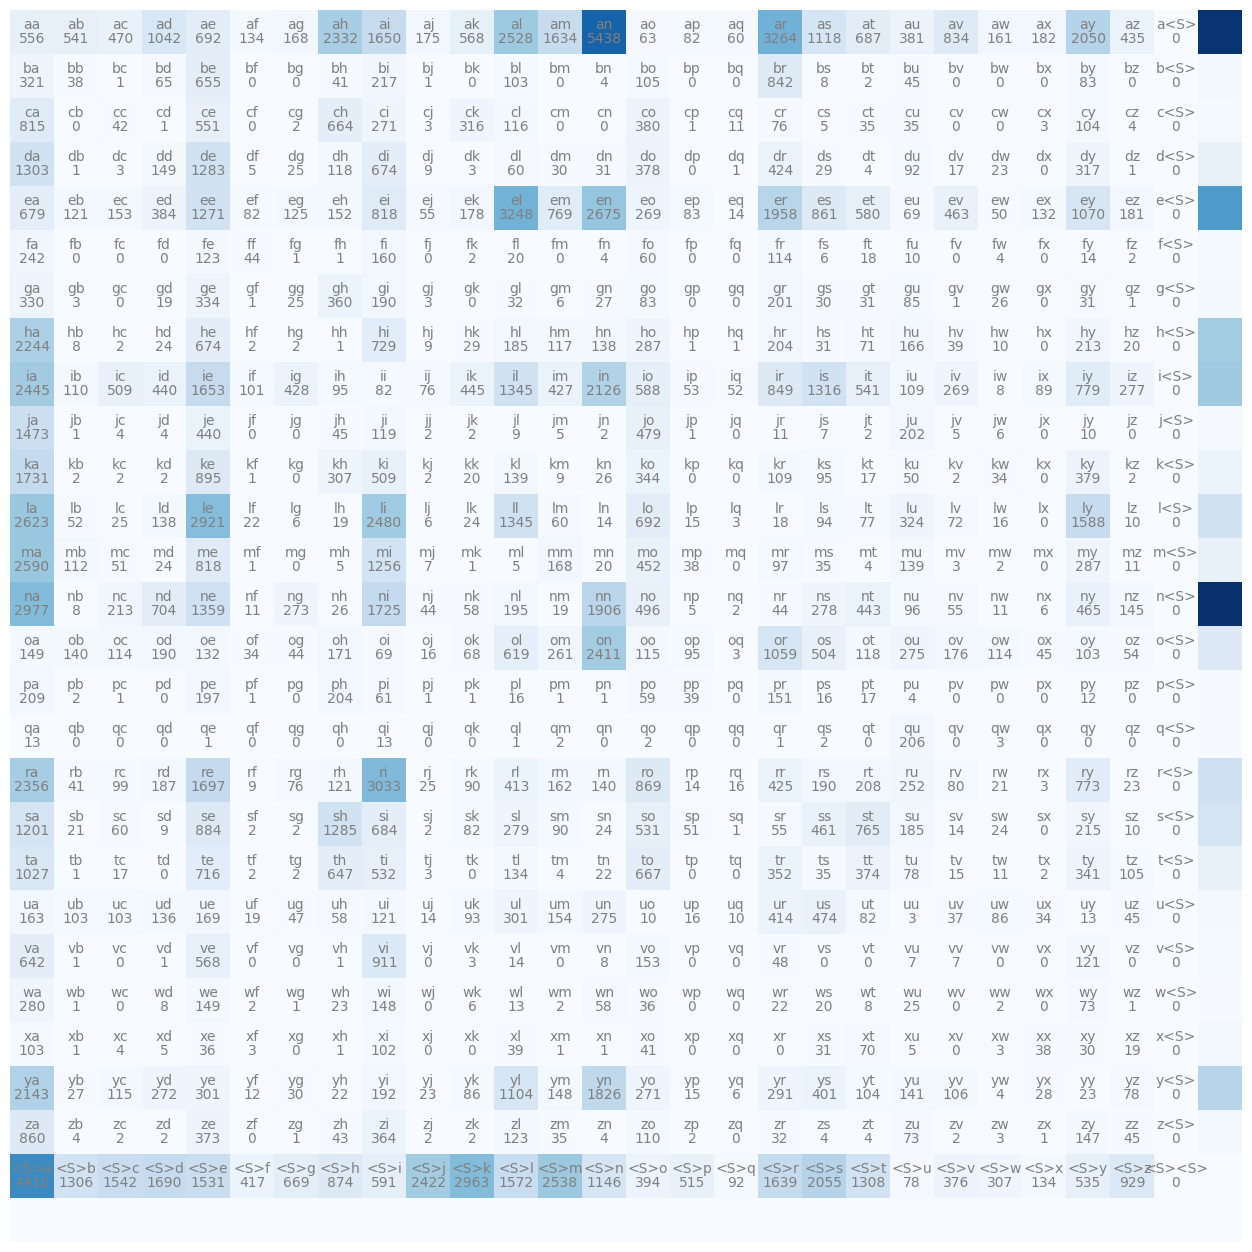

In [55]:
# now let's format the printing of the tensor
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');